# Imports

In [75]:
import sys
sys.path.insert(0, '/Users/hinzlehome/codeup-data-science/clustering-exercises/')

from utils.acquire import *
from utils.imports import *

# Zillow

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:


Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.



In [76]:
train=acquire()

/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_1333/2364341274.py:1: DtypeWarning: Columns (63) have mixed types.Specify dtype option on import or set low_memory=False.
  train=acquire()


## 1. Does logerror differ across counties (fips)?


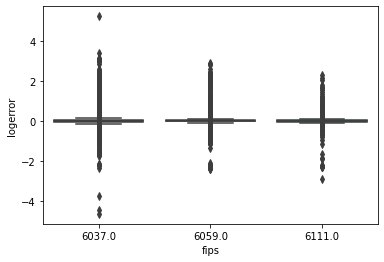

In [77]:
sns.boxplot(data=train, x='fips', y='logerror')
plt.show()

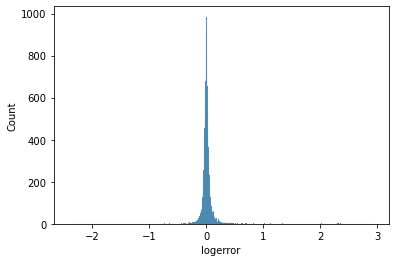

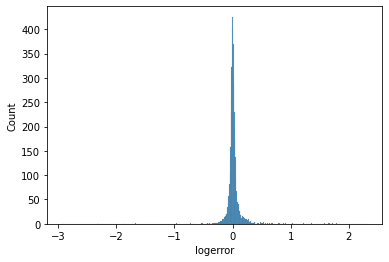

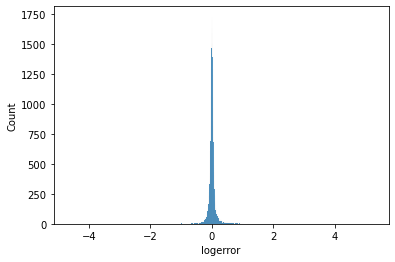

In [78]:
# verify assumptions: normal distribution
for fips_code in train.fips.unique():
    county = train[train.fips == fips_code]
    sns.histplot(county.logerror)
    plt.show()

In [79]:
df=train

In [80]:
county1 = df[df.fips == df.fips.unique()[0]]
county2 = df[df.fips == df.fips.unique()[1]]
county3 = df[df.fips == df.fips.unique()[2]]

alpha = .05
stat, p = stats.levene(county1.logerror, county2.logerror, county3.logerror)
if p < alpha:
    print('equal variances')
else: print('unequal variances')

equal variances


In [81]:
alpha = .05
stat, p = stats.f_oneway(county1.logerror, county2.logerror, county3.logerror)
stat, p

(12.108369658384907, 5.523630189971538e-06)

In [82]:
if p < alpha:
    print('reject H0')
else: print('fail to reject H0')

reject H0


## 2. Does logerror differ for properties that have garages vs. those that don't?

In [83]:
train.garagecarcnt=train.garagecarcnt.fillna(0)

In [84]:
# get the data
garages = train[train.garagecarcnt != 0]
no_garages = train[train.garagecarcnt == 0]

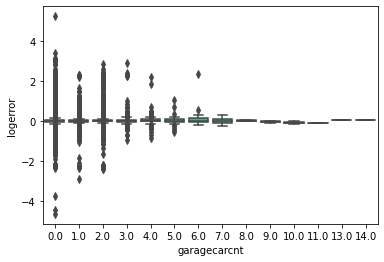

In [85]:
# visualize:
sns.boxplot(data=train, 
            x='garagecarcnt',
            y='logerror')
plt.show()

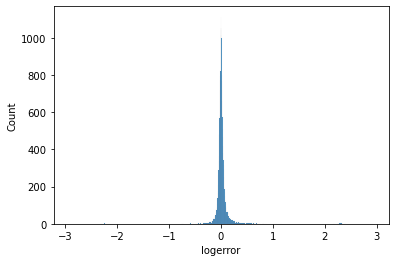

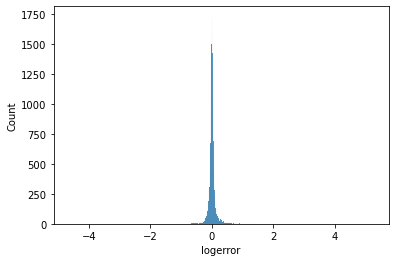

In [86]:
# verify assumptions: normal distribution
for subset in [garages, no_garages]:
    sns.histplot(subset.logerror)
    plt.show()

In [87]:
# verify assumptions: equal variances:
alpha = .05
stat, p = stats.levene(garages.logerror, no_garages.logerror)
if p < alpha:
    print('equal variances')
else: print('unequal variances')


equal variances


In [88]:
# perform the test
alpha = .05
t, p = stats.ttest_ind(garages.logerror, no_garages.logerror)
stat, p


(131.64650883134632, 6.762378739017739e-05)

In [89]:
if p < alpha:
    print('reject H0')
else: print('fail to reject H0')

reject H0


## 3. Does logerror differ for properties that have pools vs those that don't?

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77380 non-null  int64  
 1   parcelid                      77380 non-null  int64  
 2   airconditioningtypeid         24953 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77380 non-null  float64
 6   bedroomcnt                    77380 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49671 non-null  float64
 9   calculatedbathnbr             76771 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6023 non-null   float64
 12  calculatedfinishedsquarefeet  77184 non-null  float64
 13  f

In [91]:
train['has_pool']=train.poolcnt.fillna(0)

In [92]:
train.has_pool.iloc[0]

0.0

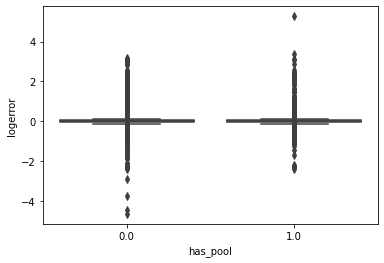

In [93]:
# visualize
sns.boxplot(data=train, x='has_pool', y='logerror')
plt.show()

In [94]:
# get data
pools = train[train.has_pool != 0]
no_pools = train[train.has_pool == 0]


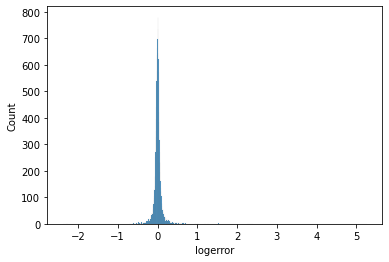

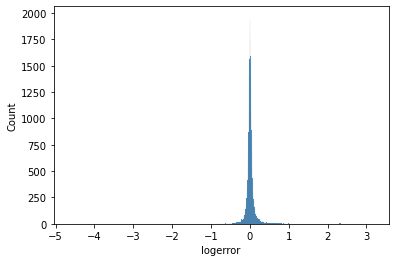

In [95]:
# verify assumptions: normal distribution
for subset in [pools, no_pools]:
    sns.histplot(subset.logerror)
    plt.show()


In [96]:
# verify assumptions: equal variances:
alpha = .05
stat, p = stats.levene(pools.logerror, no_pools.logerror)
if p < alpha:
    print('equal variances')
else: print('unequal variances')

unequal variances


In [97]:
# perform the test
alpha = .05
t, p = stats.ttest_ind(pools.logerror, no_pools.logerror)
stat, p

(3.2133071190800733, 0.015201692202048712)

In [98]:
if p < alpha:
    print('reject H0')
else: print('fail to reject H0')


reject H0


## 4. Does logerror differ for properties that have a hot tub or spa vs those that don't?

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77380 entries, 0 to 77379
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77380 non-null  int64  
 1   parcelid                      77380 non-null  int64  
 2   airconditioningtypeid         24953 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77380 non-null  float64
 6   bedroomcnt                    77380 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49671 non-null  float64
 9   calculatedbathnbr             76771 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6023 non-null   float64
 12  calculatedfinishedsquarefeet  77184 non-null  float64
 13  f

In [100]:
train.hashottuborspa=train.hashottuborspa.fillna(0)

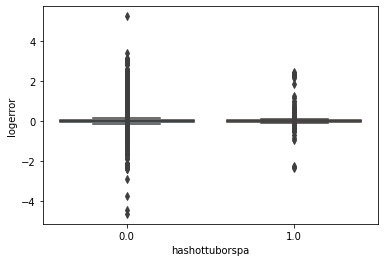

In [101]:
# visualize
sns.boxplot(data=train, x='hashottuborspa', y='logerror')
plt.show()

In [102]:
# get the data
hottubs = train[train.hashottuborspa != 1]
no_hottubs = train[train.hashottuborspa == 0]

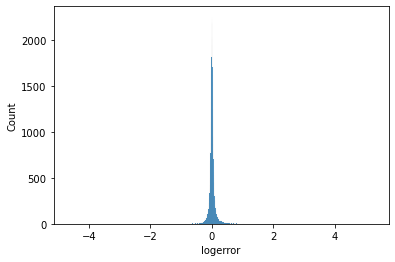

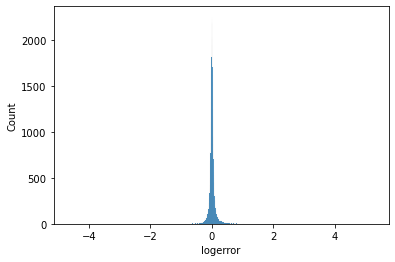

In [103]:
# verify assumptions: normal distribution
for subset in [hottubs, no_hottubs]:
    sns.histplot(subset.logerror)
    plt.show()

In [104]:
# verify assumptions: equal variances:
alpha = .05
stat, p = stats.levene(hottubs.logerror, no_hottubs.logerror)
if p < alpha:
    print('equal variances')
else: print('unequal variances')

unequal variances


In [105]:
# perform the test (unequal variances >> non-parametric test == Mann-Whitney)
alpha = .05
stat, p = stats.mannwhitneyu(hottubs.logerror, no_hottubs.logerror)
stat, p


(2876004482.0, 1.0)

In [106]:
if p < alpha:
    print('reject H0')
else: print('fail to reject H0')

fail to reject H0


## 5. Is there a difference in logerror for properties with fireplaces vs those without?

In [107]:
train['has_fireplace']=train.fireplacecnt.fillna(0)

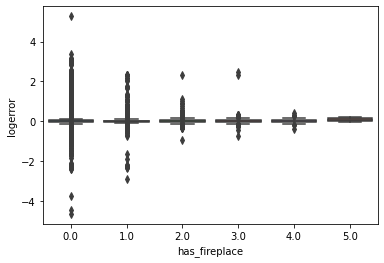

In [108]:
# visualize:
sns.boxplot(data=train, 
            x='has_fireplace',
            y='logerror')
plt.show()

In [109]:
# get the data
fireplaces = train[train.has_fireplace == 1]
no_fireplaces = train[train.has_fireplace == 0]

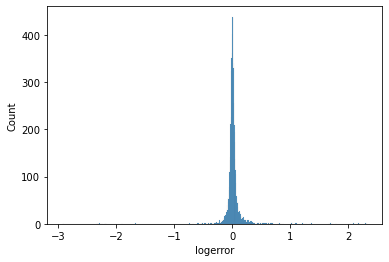

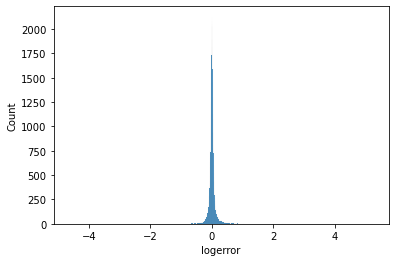

In [110]:
# verify assumptions: normal distribution
for subset in [fireplaces, no_fireplaces]:
    sns.histplot(subset.logerror)
    plt.show()

In [111]:
# verify assumptions: equal variances:
alpha = .05
stat, p = stats.levene(hottubs.logerror, no_hottubs.logerror)
if p < alpha:
    print('equal variances')
else: print('unequal variances')

unequal variances


In [112]:
if p < alpha:
    print('reject H0')
else: print('fail to reject H0')

fail to reject H0
